<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#The-Linear-Model" data-toc-modified-id="The-Linear-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Linear Model</a></span><ul class="toc-item"><li><span><a href="#Timing" data-toc-modified-id="Timing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Timing</a></span></li><li><span><a href="#Discussion:-How-can-the-Central-Bank-maximize-social-utility?" data-toc-modified-id="Discussion:-How-can-the-Central-Bank-maximize-social-utility?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Discussion: How can the Central Bank maximize social utility?</a></span></li></ul></li><li><span><a href="#The-Quadratic-Model" data-toc-modified-id="The-Quadratic-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Quadratic Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Solve-for-$\mathbb-E[\pi]$" data-toc-modified-id="Solve-for-$\mathbb-E[\pi]$-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Solve for $\mathbb E[\pi]$</a></span><ul class="toc-item"><li><span><a href="#Discussion:-Differences/Similarities-with-the-linear-result?" data-toc-modified-id="Discussion:-Differences/Similarities-with-the-linear-result?-3.0.1.1"><span class="toc-item-num">3.0.1.1&nbsp;&nbsp;</span>Discussion: Differences/Similarities with the linear result?</a></span></li></ul></li><li><span><a href="#Solve-for-Expected-Utility" data-toc-modified-id="Solve-for-Expected-Utility-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Solve for Expected Utility</a></span></li></ul></li></ul></li></ul></div>

# Introduction

Barro-Gordon is a famous model about central bank *commitment*. It will be our bridge from deterministic models, where we simply write down macroeconomic equations, to a model with "micro foundations", where macroeconomic consequences happen as a result of agents in the economy behaving in a rational manner.

It will also force us to think about timing rules within a static model. Rather than thinking about time in terms of "time series" we instead think about who chooses what, and when. This will have important consequences for the effectiveness of an activist central bank.

In [1]:
%matplotlib inline

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# The Linear Model

The macroeconomy will be very simple: there is output, which households totally consume. Households are many and small, so their individual choices don't have macroeconomic consequences, and they can't coordinate. 

Economic output is a function of inflation and a stochastic output shock, $\epsilon \sim N(0, \sigma_\epsilon)$:

$$y = y_n + a (\pi - \mathbb E[\pi]) + \epsilon$$

The households will all individually choose what their expected inflation is. They will do this with full knowledge of the Central Bank's policy, which is given by the following utility function:

$$U = \lambda y + \frac{1}{2}(\pi)^2$$

The central bank will direclty choose the inflation level $\pi$ to maximize their utility function. 

Sympy can help us with the math.

In [2]:
yn, a, λ, π, π_e, ϵ = sp.symbols(['y_n', 'a', '\lambda', '\pi', r'\mathbb{E}[\pi]', 'ϵ'])
y = yn + a * (π - π_e) + ϵ
U = λ * y - 0.5 * π ** 2
U

\lambda*(a*(-\mathbb{E}[\pi] + \pi) + y_n + ϵ) - 0.5*\pi**2

In [3]:
π_star = sp.solve(U.diff(π), π)[0]
π_star

\lambda*a

## Timing

The Central Bank will act first in our model, acting as the Stackelberg leader. It will set $\pi = \pi^\star = \lambda a$, according to their utility function.

Households know this utility function, so they will choose $\mathbb E [\pi] = \pi^\star = \lambda a$. As a result, economic output will be:


$$\begin{align}y &= y_n + a(\pi - \mathbb E[\pi]) + \epsilon \\
                 &= y_n + a(\pi^\star - \pi^\star) +\epsilon \\
                 &= y_n + \epsilon \end{align}$$
                 
What has happened? The central bank commited to non-zero inflation ($\lambda a$), because they care about having positive growth (the first term in the utility function). But then households anticipated this action by the central bank, and caneled out the benefit! The net result is inflation with no growth -- a societial loss of utility!  


We can compute expected utility by plugging $\pi = \mathbb E[\pi] = \pi^\star$ into the utility function and take expectations. Noting that $\mathbb E[\epsilon] = 0$, we can use the `.subs` method to swap out variables for other variables in a sympy equation.

In [4]:
U.subs({π:π_star, π_e:π_star, ϵ:0})

-0.5*\lambda**2*a**2 + \lambda*y_n

Compared to a situation where the central bank just chooses $\pi = 0$, utility is reduced by $0.5 \lambda^2 a^2$! 

## Discussion: How can the Central Bank maximize social utility?

Define social utility as the central bank's utility function/

# The Quadratic Model

In the linear model, the bank only wants positive growth, at any cost. Perhaps it's more realistic to consider a bank that has a growth target, and uses inflation to either stimulate or cool off the economy. Instead of a utility function, define a **loss function**, which is negative utility:

$$V = \frac{1}{2}\lambda(y - k) ^ 2 + \frac{1}{2} \pi^2$$

Where $k$ is the target growth rate for the bank.

In [5]:
k = sp.Symbol('k')

In [6]:
V = 0.5 * λ * (y - k) ** 2 + 0.5 * π ** 2

Once again, let's let sympy solve the minimization problem for us.

In [7]:
π_star_quad = sp.solve(V.diff(π), π)[0]
π_star_quad

\lambda*a*(\mathbb{E}[\pi]*a + k - y_n - ϵ)/(\lambda*a**2 + 1.0)

In [8]:
f_π_star = sp.lambdify([π_e, a, λ, k, yn, ϵ], π_star_quad)

In [9]:
k_val = 6
yn_val = 3
λ_val = 1.5
a_val = 0.8
ϵ_val = 0

π_e_val = np.linspace(0, 5, 100)

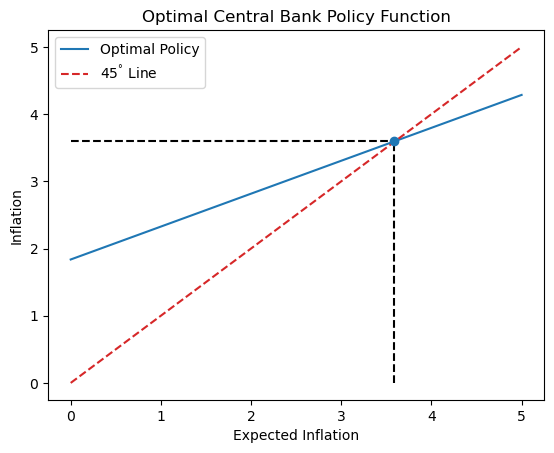

In [10]:
fig, ax = plt.subplots()
π_val = f_π_star(π_e_val, a_val, λ_val, k_val, yn_val, ϵ_val)
ax.plot(π_e_val, π_val, label='Optimal Policy')
ax.plot(π_e_val, π_e_val, ls='--', color='tab:red', label='$45^\degree$ Line')

equlibrium_idx = np.argmin((π_val - π_e_val) ** 2)
ax.scatter(π_e_val[equlibrium_idx], π_val[equlibrium_idx], zorder=10)
ax.hlines(π_val[equlibrium_idx], 0, π_e_val[equlibrium_idx], ls='--', color='black')
ax.vlines(π_e_val[equlibrium_idx], 0, π_val[equlibrium_idx], ls='--', color='black')
ax.set(xlabel = 'Expected Inflation', ylabel='Inflation', title='Optimal Central Bank Policy Function')
ax.legend()
plt.show()

In [11]:
equlibrium_π = π_val[equlibrium_idx]
print(f'Equlibrium inflation: {equlibrium_π:0.2f}')

Equlibrium inflation: 3.59


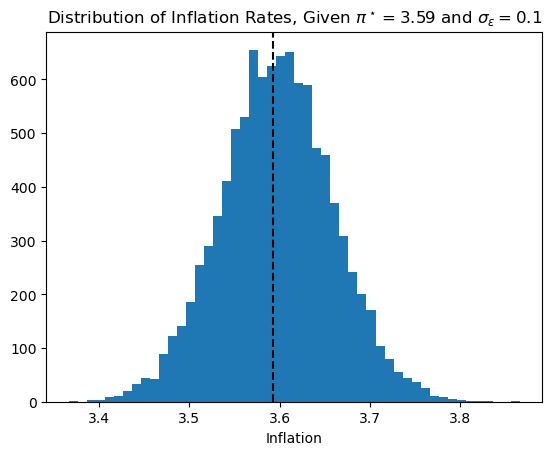

In [12]:
rng = np.random.default_rng(sum([ord(x) for x in 'PSME-MACRO']))
fig, ax = plt.subplots()
σ_ϵ = 0.1
ax.hist(f_π_star(equlibrium_π, a_val, λ_val, k_val, yn_val, rng.normal(loc=0, scale=σ_ϵ, size=10_000)), bins=50)
ax.axvline(equlibrium_π, ls='--', color='black')
ax.set(xlabel='Inflation', 
       title=f'Distribution of Inflation Rates, Given $\pi^\star = {equlibrium_π:0.2f}$ and $\sigma_\epsilon = {σ_ϵ}$')
plt.show()

### Solve for $\mathbb E[\pi]$

As before, we know the households will choose $\mathbb E[\pi] = \pi^\star$, because the central bank acts first, locks in a rate, and the households know the central bank loss function. Therefore, we have:

In [47]:
π_e_star = sp.solve(π_e - π_star_quad, π_e)[0].subs({ϵ:0})
π_e_star

\lambda*a*(k - y_n)

#### Discussion: Differences/Similarities with the linear result?

### Solve for Expected Utility

Utility is the negative of the loss function, so let's plug everything in and solve it.

In [63]:
pi_subbed = π_star_quad.subs({π_e:π_e_star})
pi_subbed

\lambda*a*(\lambda*a**2*(k - y_n) + k - y_n - ϵ)/(\lambda*a**2 + 1.0)

-1.0*\lambda*a*ϵ/(\lambda*a**2 + 1)

In [77]:
σ_ϵ = sp.Symbol('\sigma_\epsilon')
E_V = (V.replace(π - π_e, (pi_subbed - π_e_star).simplify())
       .replace(π, pi_subbed)
       .expand()
       .replace(ϵ ** 2, σ_ϵ ** 2)
       .subs({ϵ:0})
       .simplify())

In [92]:
sp.nsimplify(E_V).cancel().simplify()

\lambda*(\lambda**2*a**4*k**2 - 2*\lambda**2*a**4*k*y_n + \lambda**2*a**4*y_n**2 + 2*\lambda*a**2*k**2 - 4*\lambda*a**2*k*y_n + 2*\lambda*a**2*y_n**2 + \sigma_\epsilon**2 + k**2 - 2*k*y_n + y_n**2)/(2*(\lambda*a**2 + 1))

In [78]:
α = 1 / (1 + a **2 * λ)
β = a * λ
E_V_byhand = (0.5 * λ * (α**2 * σ_ϵ ** 2 + (yn - k) ** 2) + 0.5 * β ** 2 * (α ** 2 * σ_ϵ ** 2 + (k - yn) ** 2)).simplify()

In [100]:
E_V_byhand

0.5*\lambda*(\sigma_\epsilon**2 + (k - y_n)**2*(\lambda*a**2 + 1)**2)/(\lambda*a**2 + 1)

In [98]:
sp.nsimplify(E_V_byhand.expand().cancel().simplify())

\lambda*(\lambda**2*a**4*k**2/2 - \lambda**2*a**4*k*y_n + \lambda**2*a**4*y_n**2/2 + \lambda*a**2*k**2 - 2*\lambda*a**2*k*y_n + \lambda*a**2*y_n**2 + \sigma_\epsilon**2/2 + k**2/2 - k*y_n + y_n**2/2)/(\lambda*a**2 + 1)

In [79]:
rvs = rng.normal(size=5)
sp.lambdify([a, k, yn, σ_ϵ, λ], E_V)(*rvs)

-0.29356926800344096

In [80]:
sp.lambdify([a, k, yn, σ_ϵ, λ], E_V_byhand)(*rvs)

-0.2935692680034409